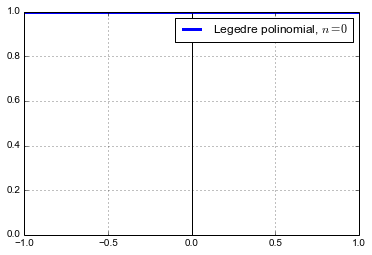

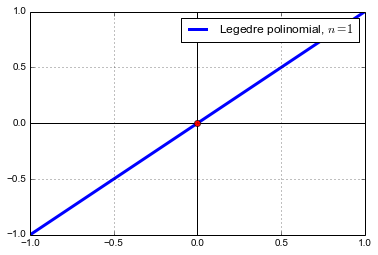

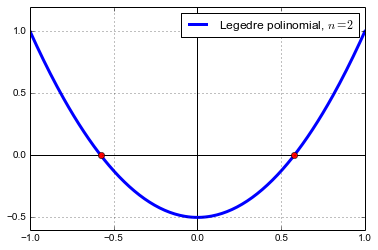

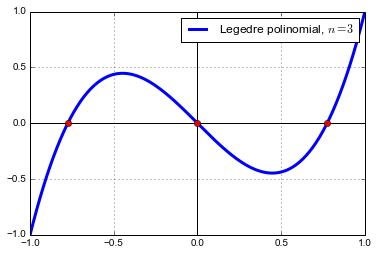

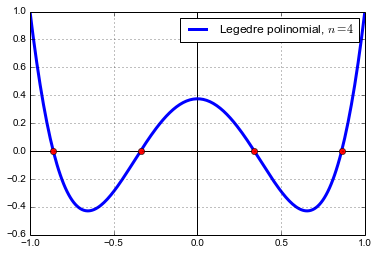

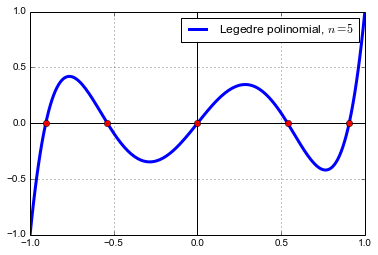

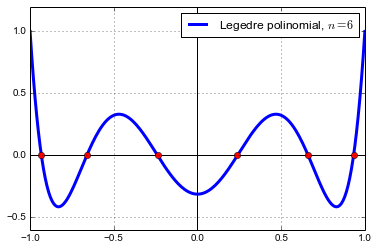

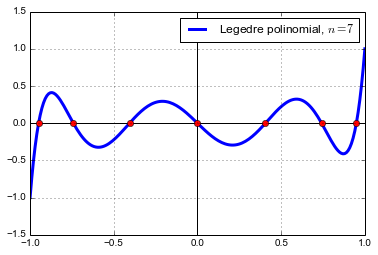

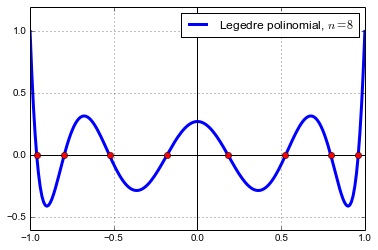

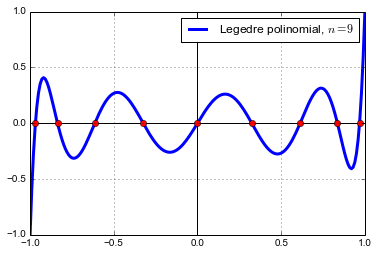

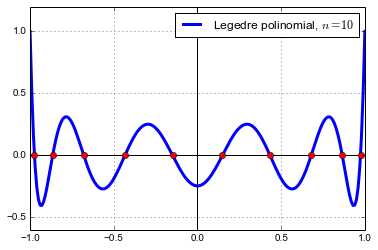

In [67]:
from numpy.polynomial.legendre import Legendre

a, b = -1, 1
x = linspace(a, b, 200) # 200 points in [a,b]

for n in range(11):
    L_n = Legendre.basis(n)
    axhline(c='k'); axvline(c='k'); # Plot OX and OY axis (Color=blacK)
    plot(x, L_n(x), lw=3, label="Legedre polinomial, $n=" + str(n) + "$")
    plot(L_n.roots(), zeros(n), 'o', c='r') # Plot roots of polinomials
    grid()
    legend()
    show()

En python se puede realizar, automáticamente, un **cambio de variables** para llevar los polinomios de Legendre a un dominio cualquiera, [a,b]:

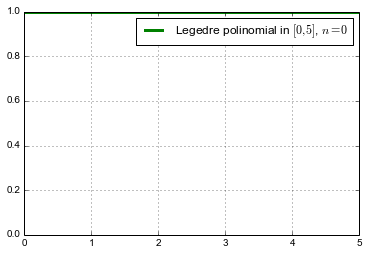

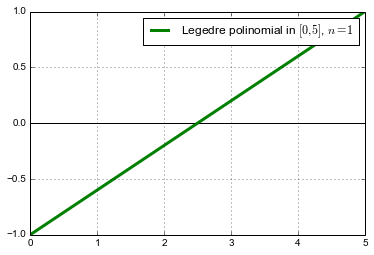

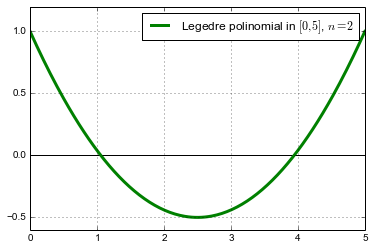

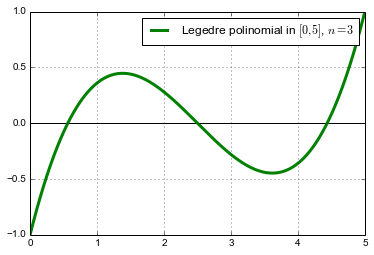

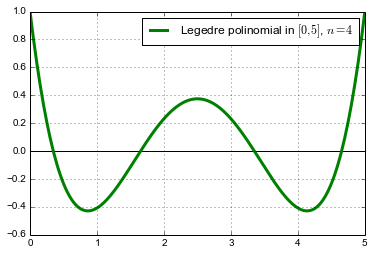

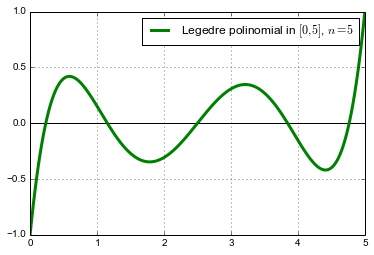

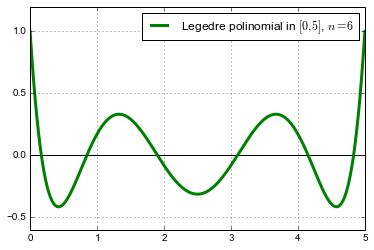

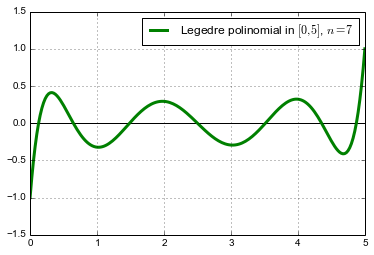

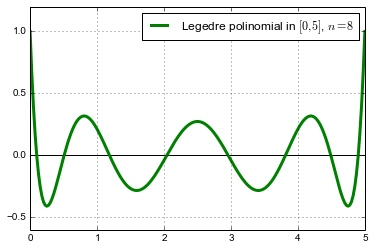

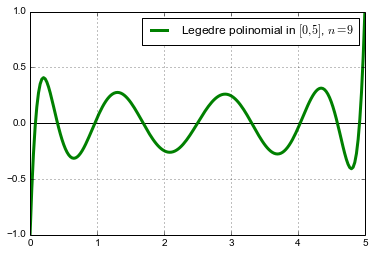

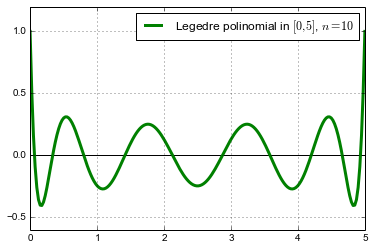

In [59]:
from numpy.polynomial.legendre import Legendre

a, b = 0, 5
x = linspace(a, b, 200) # 200 points in [a,b]

for n in range(11):
    L_n = Legendre.basis(n, domain=[a, b])
    axhline(c='k'); axvline(c='k'); # Plot OX and OY axis (Color=blacK)
    plot(x, L_n(x), lw=3, c='g', 
         label="Legedre polinomial in $[%g,%g]$, $n=%i$" % (a, b, n))
    grid()
    legend()
    show()

Construímos la **matriz de masa** con polinomios de Legendre. Como los polinomios son ortogonales, la matriz debe ser diagonal.

In [68]:
from scipy.integrate import quad # Numerical integration (quadrature)

a, b = -1, 1
N, M = 7, 7
A = array( zeros( (M, N) ) ) # Zero NxM matrix
for i in range(M):
    L_i = Legendre.basis(i)
    for j in range(N): 
        L_j = Legendre.basis(j)
        value, error = quad(L_i*L_j, a, b)
        print i, j, value
        A[i,j] = value

0 0 2.0
0 1 0.0
0 2 5.55111512313e-17
0 3 0.0
0 4 3.81639164715e-17
0 5 0.0
0 6 1.87350135405e-16
1 0 0.0
1 1 0.666666666667
1 2 0.0
1 3 2.77555756156e-17
1 4 0.0
1 5 -6.93889390391e-18
1 6 0.0
2 0 5.55111512313e-17
2 1 0.0
2 2 0.4
2 3 0.0
2 4 -2.77555756156e-17
2 5 0.0
2 6 5.37764277553e-17
3 0 0.0
3 1 2.77555756156e-17
3 2 0.0
3 3 0.285714285714
3 4 0.0
3 5 0.0
3 6 0.0
4 0 3.81639164715e-17
4 1 0.0
4 2 -2.77555756156e-17
4 3 0.0
4 4 0.222222222222
4 5 0.0
4 6 2.68882138776e-17
5 0 0.0
5 1 -6.93889390391e-18
5 2 0.0
5 3 0.0
5 4 0.0
5 5 0.181818181818
5 6 0.0
6 0 1.87350135405e-16
6 1 0.0
6 2 5.37764277553e-17
6 3 0.0
6 4 2.68882138776e-17
6 5 0.0
6 6 0.153846153846


In [70]:
A

array([[  2.00000000e+00,   0.00000000e+00,   5.55111512e-17,
          0.00000000e+00,   3.81639165e-17,   0.00000000e+00,
          1.87350135e-16],
       [  0.00000000e+00,   6.66666667e-01,   0.00000000e+00,
          2.77555756e-17,   0.00000000e+00,  -6.93889390e-18,
          0.00000000e+00],
       [  5.55111512e-17,   0.00000000e+00,   4.00000000e-01,
          0.00000000e+00,  -2.77555756e-17,   0.00000000e+00,
          5.37764278e-17],
       [  0.00000000e+00,   2.77555756e-17,   0.00000000e+00,
          2.85714286e-01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  3.81639165e-17,   0.00000000e+00,  -2.77555756e-17,
          0.00000000e+00,   2.22222222e-01,   0.00000000e+00,
          2.68882139e-17],
       [  0.00000000e+00,  -6.93889390e-18,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.81818182e-01,
          0.00000000e+00],
       [  1.87350135e-16,   0.00000000e+00,   5.37764278e-17,
          0.00000000e+00,   2.68

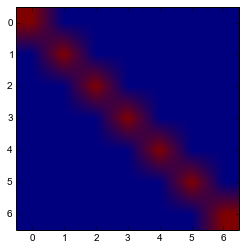

In [71]:
imshow((abs(A)>=1e-15)) # Plot non-zero elements